In [30]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"anishakumari180404","key":"329d32142f6e1587133850504131accd"}'}

In [ ]:
!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle --version


Kaggle API 1.7.4.5


In [ ]:
!ls

kaggle.json  sample_data


In [43]:
!kaggle datasets download -d anishakumari180404/bone-x-ray-disease-image-dataset --force


Dataset URL: https://www.kaggle.com/datasets/anishakumari180404/bone-x-ray-disease-image-dataset
License(s): unknown
  0% 0.00/36.6M [00:00<?, ?B/s]
100% 36.6M/36.6M [00:00<00:00, 599MB/s]


In [45]:
!unzip -o bone-x-ray-disease-image-dataset.zip


Archive:  bone-x-ray-disease-image-dataset.zip
  inflating: bone_xray_dataset/avascular_necrosis/avascular_necrosis_1.png  
  inflating: bone_xray_dataset/avascular_necrosis/avascular_necrosis_10.png  
  inflating: bone_xray_dataset/avascular_necrosis/avascular_necrosis_2.png  
  inflating: bone_xray_dataset/avascular_necrosis/avascular_necrosis_3.png  
  inflating: bone_xray_dataset/avascular_necrosis/avascular_necrosis_4.png  
  inflating: bone_xray_dataset/avascular_necrosis/avascular_necrosis_5.png  
  inflating: bone_xray_dataset/avascular_necrosis/avascular_necrosis_6.png  
  inflating: bone_xray_dataset/avascular_necrosis/avascular_necrosis_7.png  
  inflating: bone_xray_dataset/avascular_necrosis/avascular_necrosis_8.png  
  inflating: bone_xray_dataset/avascular_necrosis/avascular_necrosis_9.png  
  inflating: bone_xray_dataset/bone_cyst/bone_cyst_1.png  
  inflating: bone_xray_dataset/bone_cyst/bone_cyst_10.png  
  inflating: bone_xray_dataset/bone_cyst/bone_cyst_2.png  
  in

In [46]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


In [47]:
base_path = "bone_xray_dataset"
print(os.listdir(base_path))


['paget_disease', 'osteomyelitis', 'osteoarthritis', 'osteoporosis', 'bone_tumor', 'bone_cyst', 'avascular_necrosis', 'rheumatoid_arthritis', 'rickets', 'fracture']


In [48]:
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    base_path,
    target_size=(224,224),
    batch_size=8,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    base_path,
    target_size=(224,224),
    batch_size=8,
    class_mode="categorical",
    subset="validation"
)


Found 80 images belonging to 10 classes.
Found 20 images belonging to 10 classes.


In [49]:
base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

# Freeze VGG16 layers
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


In [50]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [51]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 67s 7s/step - accuracy: 0.0649 - loss: 26.2964 - val_accuracy: 0.1500 - val_loss: 14.9897
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 72s 7s/step - accuracy: 0.2863 - loss: 12.0146 - val_accuracy: 0.2000 - val_loss: 11.7157
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.4465 - loss: 6.4094 - val_accuracy: 0.1500 - val_loss: 15.4424
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.5895 - loss: 3.6604 - val_accuracy: 0.1000 - val_loss: 15.0622
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.5971 - loss: 3.6660 - val_accuracy: 0.1000 - val_loss: 13.5445
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.6536 - loss: 2.6950 - val_accuracy: 0.1000 - val_loss: 12.5133
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 71s 7s/step - accuracy: 0.6953 - loss: 3.0209 - val_accuracy: 0.1000 - val_loss: 12.7978
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.6760 - loss: 2.4359 - val_accuracy: 0.2000 - 

In [52]:
model.save("bone_xray_vgg16_model.h5")


In [53]:
test_loss, test_acc = model.evaluate(val_data)
print("VGG16 Test Accuracy:", test_acc)


3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.2094 - loss: 6.5964
VGG16 Test Accuracy: 0.20000000298023224


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step
Actual: osteomyelitis
Predicted: osteomyelitis
Confidence: 100.00%


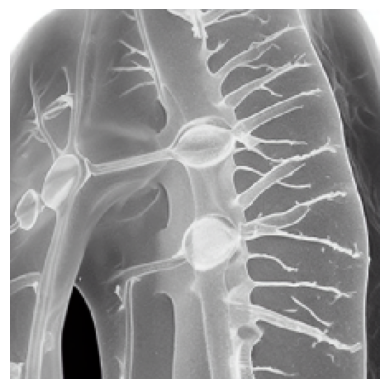

In [54]:
from tensorflow.keras.preprocessing import image
import random

classes = list(train_data.class_indices.keys())

actual_class = random.choice(os.listdir(base_path))
img_name = random.choice(os.listdir(os.path.join(base_path, actual_class)))
img_path = os.path.join(base_path, actual_class, img_name)

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = classes[np.argmax(prediction)]
confidence = np.max(prediction) * 100

plt.imshow(img)
plt.axis("off")

print("Actual:", actual_class)
print("Predicted:", predicted_class)
print(f"Confidence: {confidence:.2f}%")
